Consider the Chronic Kidney Disease (CKD) dataset ckd.csv to develop a KNN classifier model.  Given that a new patient Alice has Haemoglobin 0 and Glucose levels 1.1 standard deviations above average, find if Alice is likely to have CKD.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [88]:
data1=pd.read_csv(r'C:\Users\adwai\OneDrive\Documents\Amrita\SEM 5\ACADEMICS\FODS\Assignment4\ckd.csv')
data1

,Unnamed: 0,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,0,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,3,68,80,1.010,3,2,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,153,55,80,1.020,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,0
154,154,42,70,1.025,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,0
155,155,12,80,1.020,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,0
156,156,17,60,1.025,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,0


In [89]:
data1.dtypes

Unnamed: 0                   int64
Age                          int64
Blood Pressure               int64
Specific Gravity           float64
Albumin                      int64
Sugar                        int64
Red Blood Cells             object
Pus Cell                    object
Pus Cell clumps             object
Bacteria                    object
Blood Glucose Random         int64
Blood Urea                   int64
Serum Creatinine           float64
Sodium                       int64
Potassium                  float64
Hemoglobin                 float64
Packed Cell Volume           int64
White Blood Cell Count       int64
Red Blood Cell Count       float64
Hypertension                object
Diabetes Mellitus           object
Coronary Artery Disease     object
Appetite                    object
Pedal Edema                 object
Anemia                      object
Class                        int64
dtype: object

In [90]:
data1['Blood Glucose Random'].dtype

dtype('int64')

In [91]:
data1['Class'].unique()


array([1, 0], dtype=int64)

In [92]:
class1=data1[data1['Class']==1]
class0=data1[data1['Class']==0]


In [93]:
class0

,Unnamed: 0,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
43,43,40,80,1.025,0,0,normal,normal,notpresent,notpresent,...,48,10400,4.5,no,no,no,good,no,no,0
44,44,23,80,1.025,0,0,normal,normal,notpresent,notpresent,...,52,9800,5.0,no,no,no,good,no,no,0
45,45,45,80,1.025,0,0,normal,normal,notpresent,notpresent,...,46,9100,4.7,no,no,no,good,no,no,0
46,46,57,80,1.025,0,0,normal,normal,notpresent,notpresent,...,42,6200,6.2,no,no,no,good,no,no,0
47,47,51,60,1.025,0,0,normal,normal,notpresent,notpresent,...,49,8300,5.2,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,153,55,80,1.020,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,0
154,154,42,70,1.025,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,0
155,155,12,80,1.020,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,0
156,156,17,60,1.025,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,0


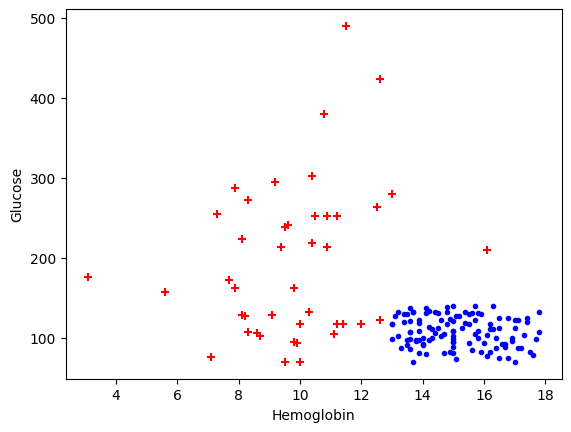

In [94]:
plt.xlabel('Hemoglobin')
plt.ylabel('Glucose')
plt.scatter(class1['Hemoglobin'],class1['Blood Glucose Random'],color='red',marker='+')
plt.scatter(class0['Hemoglobin'],class0['Blood Glucose Random'],color='blue',marker='.')
plt.show()


In [95]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia', 'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    data1[column] = label_encoder.fit_transform(data1[column])

data1



,Unnamed: 0,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,0,48,70,1.005,4,0,1,0,1,0,...,32,6700,3.9,1,0,0,1,1,1,1
1,1,53,90,1.020,2,0,0,0,1,0,...,29,12100,3.7,1,1,0,1,0,1,1
2,2,63,70,1.010,3,0,0,0,1,0,...,32,4500,3.8,1,1,0,1,1,0,1
3,3,68,80,1.010,3,2,1,0,1,1,...,16,11000,2.6,1,1,1,1,1,0,1
4,4,61,80,1.015,2,0,0,0,0,0,...,24,9200,3.2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,153,55,80,1.020,0,0,1,1,0,0,...,47,6700,4.9,0,0,0,0,0,0,0
154,154,42,70,1.025,0,0,1,1,0,0,...,54,7800,6.2,0,0,0,0,0,0,0
155,155,12,80,1.020,0,0,1,1,0,0,...,49,6600,5.4,0,0,0,0,0,0,0
156,156,17,60,1.025,0,0,1,1,0,0,...,51,7200,5.9,0,0,0,0,0,0,0


In [96]:
df1=data1.drop(['Blood Glucose Random','Hemoglobin','Class'],axis='columns')
X = data1[['Blood Glucose Random', 'Hemoglobin']]
y = data1['Class']
X


,Blood Glucose Random,Hemoglobin
0,117,11.2
1,70,9.5
2,380,10.8
3,157,5.6
4,173,7.7
...,...,...
153,140,15.7
154,75,16.5
155,100,15.8
156,114,14.2


In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [98]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

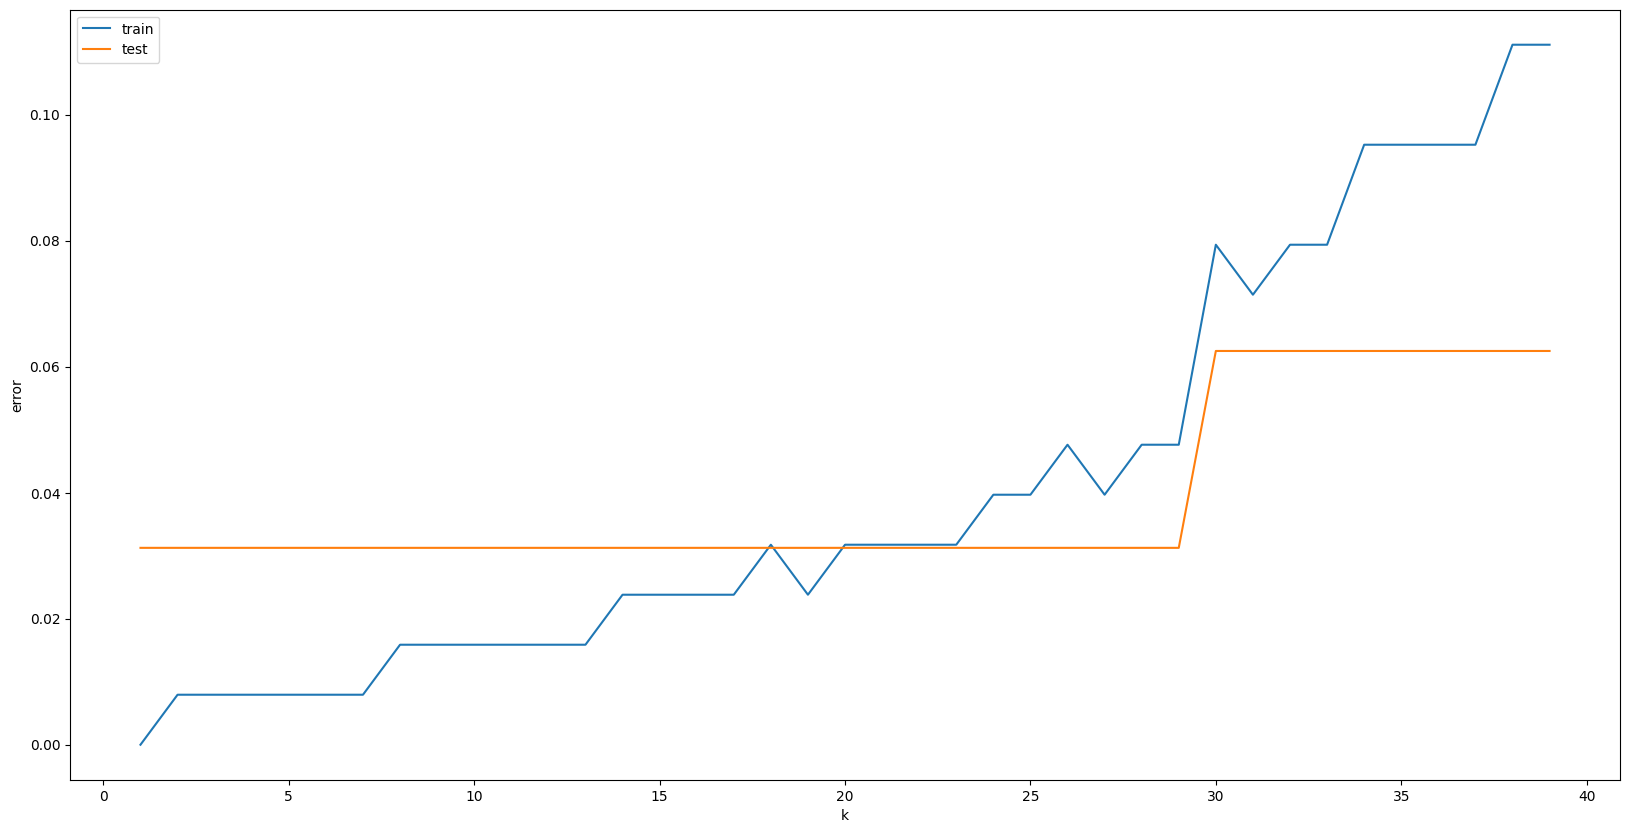

In [99]:
from sklearn.neighbors import KNeighborsClassifier
error1=[]
error2=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1=knn.predict(x_train)
    error1.append(np.mean(y_train!=y_pred1))
    y_pred2=knn.predict(x_test)
    error2.append(np.mean(y_test!=y_pred2))

plt.figure(figsize=(20,10))
plt.plot(range(1,40),error1,label='train')
plt.plot(range(1,40),error2,label='test')
plt.xlabel('k')
plt.ylabel('error')
plt.legend();


In [100]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [101]:
knn.score(x_test,y_test)

0.9375

In [102]:
x = knn.predict([[1.1,0]])
x

array([1], dtype=int64)

Develop three different classifier models for the breast-cancer.csv  dataset. Analyse your results with the standard performance measures, and compare them employing RoC curves.

In [103]:
data2=pd.read_csv(r'C:\Users\adwai\OneDrive\Documents\Amrita\SEM 5\ACADEMICS\FODS\Assignment4\breast-cancer.csv')
data2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [104]:
data2.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [105]:
data2=data2.drop(['Unnamed: 32'],axis='columns')

In [106]:
data2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [107]:
data2.dtypes


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [108]:
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()

data2['diagnosis'] = label_encoder.fit_transform(data2['diagnosis'])
data2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [109]:
X=data2.drop(['diagnosis'],axis='columns')
y=data2['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

Logistic Regression

In [110]:
# Splitting into train and test datasets using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# Model Building and training
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train, y_train)

LogisticRegression()

In [112]:
# Predicting the output
y_pred = clf.predict(X_test)

In [113]:
# Computing the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 62.28%


Decision Tree

In [114]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy")

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [116]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [117]:
model.score(X_train, y_train)

1.0

In [118]:
y_pred = model.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score
print('Model test accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model test accuracy score with criterion gini index: 0.9521


In [120]:
y_pred_train = model.predict(X_train)

In [121]:
print('Model train accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model train accuracy score with criterion gini index: 1.0000


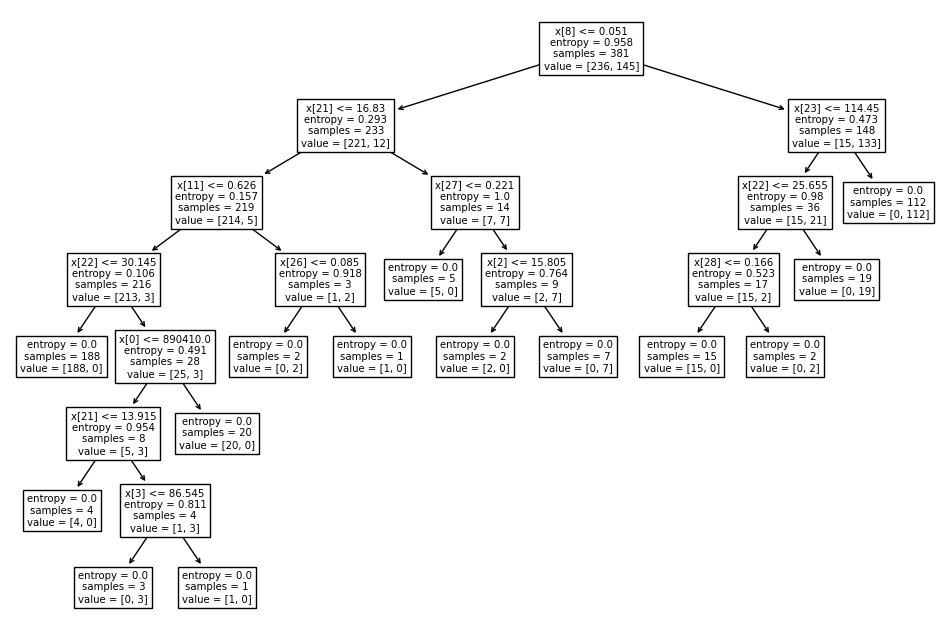

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model.fit(X_train, y_train));

In [123]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))



Accuracy: 73.40%


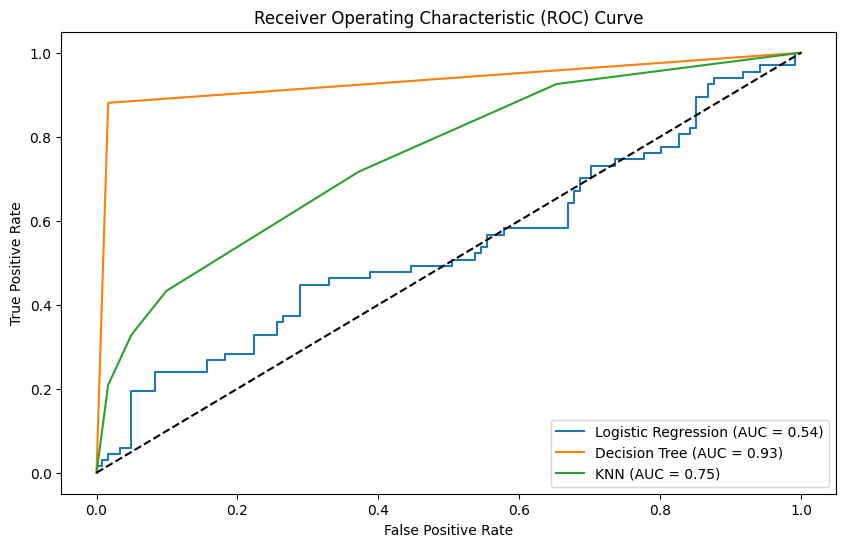

In [124]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Logistic Regression
lr_probs = clf.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Decision Tree
dt_probs = model.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# KNN
knn_probs = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

# Plotting ROC curves
plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.2f})'.format(lr_auc))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.2f})'.format(knn_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Predict Home prices employing multiple regression. Draw a residual plot for these predictions and offer your comments.

In [125]:
data3=pd.read_csv(r'C:\Users\adwai\OneDrive\Documents\Amrita\SEM 5\ACADEMICS\FODS\Assignment4\house.csv')
data3

,crime_rate,pprime_land,Luxury,Rooms,age,Central_location,Highways,Tax_rate,poor_percentage,home_price
0,0.00632,2.31,0,6.575,65.2,4.0900,1,296,4.98,24.0
1,0.02731,7.07,0,6.421,78.9,4.9671,2,242,9.14,21.6
2,0.02729,7.07,0,7.185,61.1,4.9671,2,242,4.03,34.7
3,0.03237,2.18,0,6.998,45.8,6.0622,3,222,2.94,33.4
4,0.06905,2.18,0,7.147,54.2,6.0622,3,222,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0,6.593,69.1,2.4786,1,273,9.67,22.4
502,0.04527,11.93,0,6.120,76.7,2.2875,1,273,9.08,20.6
503,0.06076,11.93,0,6.976,91.0,2.1675,1,273,5.64,23.9
504,0.10959,11.93,0,6.794,89.3,2.3889,1,273,6.48,22.0


In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
data3.isnull().any()



crime_rate          False
pprime_land         False
Luxury              False
Rooms               False
age                 False
Central_location    False
Highways            False
Tax_rate            False
poor_percentage     False
home_price          False
dtype: bool

In [127]:
X=data3.drop(['home_price'],axis='columns')
y=data3['home_price']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: home_price, Length: 506, dtype: float64

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [129]:
X


array([[0.00000000e+00, 6.78152493e-02, 0.00000000e+00, ...,
        0.00000000e+00, 2.08015267e-01, 8.96799117e-02],
       [2.35922539e-04, 2.42302053e-01, 0.00000000e+00, ...,
        4.34782609e-02, 1.04961832e-01, 2.04470199e-01],
       [2.35697744e-04, 2.42302053e-01, 0.00000000e+00, ...,
        4.34782609e-02, 1.04961832e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 4.20454545e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.64122137e-01, 1.07891832e-01],
       [1.16072990e-03, 4.20454545e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.64122137e-01, 1.31070640e-01],
       [4.61841693e-04, 4.20454545e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.64122137e-01, 1.69701987e-01]])

In [130]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [131]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(x_test)



In [134]:
# Compute the root-mean-square
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('The root-mean-square error for the model is {:.3f}'.format(rmse))


The root-mean-square error for the model is 5.413


RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

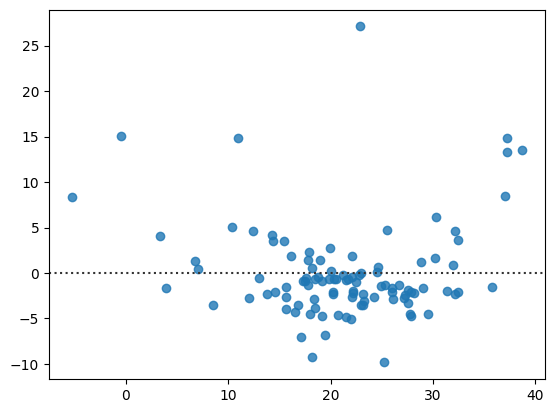

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your test and predicted values from the model
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()